# AWS Lambda Churn Prediction

- [Notebook](notebooks/python/machine-learning/churn-prediction.md)


Install packages


In [2]:
!uv pip install -q \
    diagrams==0.25.1

Import packages


In [ ]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import EC2ContainerRegistry as ECR
from diagrams.aws.compute import Lambda
from diagrams.aws.general import User
from diagrams.aws.security import IAM

Architecture diagram


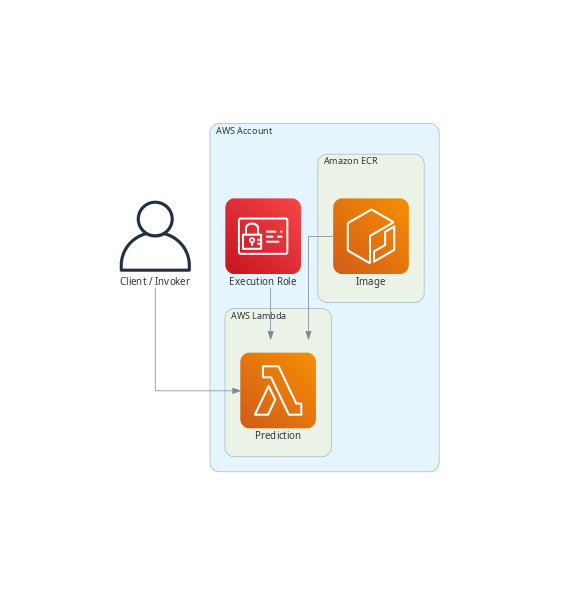

In [ ]:
with Diagram(
    show=False,
    direction="TB",
    outformat="png",
    graph_attr={
        "size": "6",  # inches
        "margin": "0.1",
    },
) as diag:

    user = User("Client / Invoker")

    with Cluster(
        "AWS Account",
        graph_attr={
            "margin": "20",
        },
    ):
        iam = IAM("Execution Role")

        with Cluster("Amazon ECR"):
            ecr = ECR("Image")

        with Cluster("AWS Lambda"):
            lambda_fn = Lambda("Prediction")

        ecr >> lambda_fn
        iam >> lambda_fn

    user >> lambda_fn

diag

Directory Structure


In [44]:
!tree -L 3

.
├── app
│   ├── Dockerfile
│   ├── event.json
│   ├── lambda_function.py
│   ├── model_C=10.bin
│   ├── pyproject.toml
│   ├── README.md
│   └── uv.lock
├── aws-lambda-churn-prediction.ipynb
├── diagrams_image.png
└── infra
    ├── main.tf
    ├── terraform.tfstate
    └── terraform.tfstate.backup

3 directories, 12 files


Application code

```py title='app/lambda_function.py'
--8<-- "docs/notebooks/python/cloud/aws-lambda-churn-predicion/app/lambda_function.py"
```

Dockerfile

```dockerfile title='app/Dockerfile'
--8<-- "docs/notebooks/python/cloud/aws-lambda-churn-predicion/app/Dockerfile"
```

Terraform

```dockerfile title='infra/main.tf'
--8<-- "docs/notebooks/python/cloud/aws-lambda-churn-predicion/infra/main.tf"
```


Copy model artifact into app directory


In [45]:
!cp ../../machine-learning/artifacts/predicting-customer-churn/model_C=10.bin ./app

Terraform initialization


In [46]:
!cd infra && \
    terraform init

Initializing the backend...
Initializing provider plugins...
- Reusing previous version of kreuzwerker/docker from the dependency lock file
- Reusing previous version of hashicorp/aws from the dependency lock file
- Using previously-installed kreuzwerker/docker v3.6.2
- Using previously-installed hashicorp/aws v5.100.0

Terraform has been successfully initialized!

You may now begin working with Terraform. Try running "terraform plan" to see
any changes that are required for your infrastructure. All Terraform commands
should now work.

If you ever set or change modules or backend configuration for Terraform,
rerun this command to reinitialize your working directory. If you forget, other
commands will detect it and remind you to do so if necessary.


Terraform validation


In [47]:
!cd infra && \
    terraform validate

Success! The configuration is valid.



Terraform plan


In [48]:
!cd infra && \
    terraform plan

data.aws_region.current: Reading...
data.aws_ecr_authorization_token.ecr: Reading...
data.aws_caller_identity.current: Reading...
data.aws_region.current: Read complete after 0s [id=us-east-1]
data.aws_caller_identity.current: Read complete after 0s [id=544244312696]
data.aws_ecr_authorization_token.ecr: Read complete after 1s [id=us-east-1]

Terraform used the selected providers to generate the following execution plan.
Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # aws_ecr_lifecycle_policy.cleanup will be created
  + resource "aws_ecr_lifecycle_policy" "cleanup" {
      + id          = (known after apply)
      + policy      = jsonencode(
            {
              + rules = [
                  + {
                      + action       = {
                          + type = "expire"
                        }
                      + description  = "Keep last 2 images"
                      + rulePriority = 1
  

Terraform apply


In [49]:
!cd infra && \
    terraform apply --auto-approve

data.aws_region.current: Reading...
data.aws_ecr_authorization_token.ecr: Reading...
data.aws_caller_identity.current: Reading...
data.aws_region.current: Read complete after 0s [id=us-east-1]
data.aws_caller_identity.current: Read complete after 0s [id=544244312696]
data.aws_ecr_authorization_token.ecr: Read complete after 0s [id=us-east-1]

Terraform used the selected providers to generate the following execution plan.
Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # aws_ecr_lifecycle_policy.cleanup will be created
  + resource "aws_ecr_lifecycle_policy" "cleanup" {
      + id          = (known after apply)
      + policy      = jsonencode(
            {
              + rules = [
                  + {
                      + action       = {
                          + type = "expire"
                        }
                      + description  = "Keep last 2 images"
                      + rulePriority = 1
  

Terraform destroy


In [50]:
!cd infra && \
    terraform destroy --auto-approve

data.aws_region.current: Reading...
data.aws_caller_identity.current: Reading...
data.aws_ecr_authorization_token.ecr: Reading...
aws_ecr_repository.lambda_repo: Refreshing state... [id=churn-prediction-lambda]
aws_iam_role.lambda_role: Refreshing state... [id=churn-prediction-lambda-role]
data.aws_region.current: Read complete after 0s [id=us-east-1]
data.aws_caller_identity.current: Read complete after 0s [id=544244312696]
data.aws_ecr_authorization_token.ecr: Read complete after 1s [id=us-east-1]
aws_ecr_lifecycle_policy.cleanup: Refreshing state... [id=churn-prediction-lambda]
aws_iam_role_policy_attachment.basic_logs: Refreshing state... [id=churn-prediction-lambda-role-20260104184406582500000001]
docker_image.lambda_image: Refreshing state... [id=sha256:c8c0790d688fa293b6d2806471ff3da2603e76b7f8f30eb1f7d69f27b4bf969c544244312696.dkr.ecr.us-east-1.amazonaws.com/churn-prediction-lambda:0f2bacac0942f7715c68395bc5249170ba3dd9ca68e4a85a148977ad654d069f]
docker_registry_image.lambda_im